In [1]:
import pandas as pd

In [2]:
a = pd.read_excel('C:/python/datas/emergency.xlsx')
a

,번호,안전비상벨관리번호,설치목적,설치장소유형,설치위치,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,연계방식,경찰연계유무,경비업체연계유무,관리사무소연계유무,부가기능,안전비상벨설치연도,최종점검일자,최종점검결과구분,관리기관명,관리기관전화번호,데이터기준일자
0,1,C-JH02-0051,방범용,가로변,가로변,서울특별시 중랑구 중랑역로3가길 31,NaN,37.596303,127.074803,단방향,N,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17
1,2,C-JH02-0052,방범용,가로변,가로변,서울특별시 중랑구 봉화산로3길 53-8,NaN,37.604046,127.075133,단방향,N,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17
2,3,C-JH02-0053,방범용,가로변,가로변,서울특별시 중랑구 중랑천로14길 24,NaN,37.594137,127.073886,단방향,N,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17
3,4,C-MK01-0001,방범용,가로변,가로변,서울특별시 중랑구 동일로152길 5,NaN,37.608485,127.078624,단방향,N,N,N,NaN,2005,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17
4,5,C-MK01-0002,방범용,가로변,가로변,서울특별시 중랑구 동일로160길 12,NaN,37.610617,127.078514,단방향,N,N,N,NaN,2005,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22176,22177,생활방범-440,방범용,가로변,중곡4동 76-56,서울특별시 광진구 긴고랑로38길 14 (중곡동),NaN,37.558510,127.090360,양방향,N,N,N,NaN,2018,2022-12-31,Y,광진구청,02-450-7678,2023-03-13
22177,22178,그린파킹-051,방범용,가로변,자양1동 223-20,서울특별시 광진구 아차산로42길 16,NaN,37.537010,127.078940,양방향,N,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13
22178,22179,그린파킹-052,방범용,가로변,중곡2동 128-14,서울특별시 광진구 용마산로5길 40,NaN,37.557600,127.085590,양방향,N,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13
22179,22180,그린파킹-053,방범용,가로변,중곡3동 191-107,서울특별시 광진구 동일로74길 15,NaN,37.567090,127.078920,양방향,N,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13


In [3]:
a.columns

Index(['번호', '안전비상벨관리번호', '설치목적', '설치장소유형', '설치위치', '소재지도로명주소', '소재지지번주소',
       'WGS84위도', 'WGS84경도', '연계방식', '경찰연계유무', '경비업체연계유무', '관리사무소연계유무', '부가기능',
       '안전비상벨설치연도', '최종점검일자', '최종점검결과구분', '관리기관명', '관리기관전화번호', '데이터기준일자'],
      dtype='object')

In [4]:
# '아네'라는 컬럼을 새로 추가, 
# 데이터는 '소재지도로명주소'를 string method를 통해 공백을 기준으로 슬라이싱
# 슬라이싱된 값으니 1번 인덱스 자리(왼쪽에서 2번째) 값을 반환

a['아네'] = a['소재지도로명주소'].str.split().str[1]

In [5]:
# '아네'에서 NaN 값인 자리에 소재지 지번 주소 삽입

a.loc[a['아네'].isna() & a['소재지지번주소'].notnull(), '아네'] = a['소재지지번주소'].str.split().str[1]

In [6]:
# '아네' 컬럼 안에 NaN값의 합 계산

a["아네"].isna().sum()

0

In [7]:
# 컬럼의 길이 파악

len(a)

22181

In [9]:
a.소재지도로명주소 = a.소재지도로명주소.str[5:]

In [10]:
a

,번호,안전비상벨관리번호,설치목적,설치장소유형,설치위치,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,연계방식,...,경비업체연계유무,관리사무소연계유무,부가기능,안전비상벨설치연도,최종점검일자,최종점검결과구분,관리기관명,관리기관전화번호,데이터기준일자,아네
0,1,C-JH02-0051,방범용,가로변,가로변,중랑구 중랑역로3가길 31,NaN,37.596303,127.074803,단방향,...,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17,중랑구
1,2,C-JH02-0052,방범용,가로변,가로변,중랑구 봉화산로3길 53-8,NaN,37.604046,127.075133,단방향,...,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17,중랑구
2,3,C-JH02-0053,방범용,가로변,가로변,중랑구 중랑천로14길 24,NaN,37.594137,127.073886,단방향,...,N,N,NaN,2017,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17,중랑구
3,4,C-MK01-0001,방범용,가로변,가로변,중랑구 동일로152길 5,NaN,37.608485,127.078624,단방향,...,N,N,NaN,2005,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17,중랑구
4,5,C-MK01-0002,방범용,가로변,가로변,중랑구 동일로160길 12,NaN,37.610617,127.078514,단방향,...,N,N,NaN,2005,2020-03-02,Y,서울특별시 중랑구청,02-2094-0284,2020-03-17,중랑구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22176,22177,생활방범-440,방범용,가로변,중곡4동 76-56,광진구 긴고랑로38길 14 (중곡동),NaN,37.558510,127.090360,양방향,...,N,N,NaN,2018,2022-12-31,Y,광진구청,02-450-7678,2023-03-13,광진구
22177,22178,그린파킹-051,방범용,가로변,자양1동 223-20,광진구 아차산로42길 16,NaN,37.537010,127.078940,양방향,...,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13,광진구
22178,22179,그린파킹-052,방범용,가로변,중곡2동 128-14,광진구 용마산로5길 40,NaN,37.557600,127.085590,양방향,...,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13,광진구
22179,22180,그린파킹-053,방범용,가로변,중곡3동 191-107,광진구 동일로74길 15,NaN,37.567090,127.078920,양방향,...,N,N,NaN,2014,2022-12-31,Y,광진구청,02-450-7678,2023-03-13,광진구


In [20]:
pd.set_option('display.max_rows', None)

t = a['아네'].value_counts()[:24]
t
# 필요없는 부분 필터링하기.

강남구     4229
중랑구     1772
영등포구    1185
동작구     1103
구로구     1049
성북구     1038
관악구      988
강서구      964
강동구      935
송파구      881
광진구      864
마포구      849
동대문구     801
금천구      709
양천구      674
중구       631
은평구      611
용산구      589
서대문구     401
종로구       82
노원구       37
서초구       34
왕십리로      22
강북구       22
Name: 아네, dtype: int64

In [27]:
t1 = t.iloc[0:22]
t1['강북구'] = 22
t1

강남구     4229
중랑구     1772
영등포구    1185
동작구     1103
구로구     1049
성북구     1038
관악구      988
강서구      964
강동구      935
송파구      881
광진구      864
마포구      849
동대문구     801
금천구      709
양천구      674
중구       631
은평구      611
용산구      589
서대문구     401
종로구       82
노원구       37
서초구       34
강북구       22
Name: 아네, dtype: int64

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    mpl.font_manager.fontManager.addfont(font)
    # print(mpl.font_manager.FontProperties(fname=font).get_name())

In [41]:
mpl.rcParams['font.family'] = 'NanumBarunGothicOTF'
print(mpl.rcParams['font.family'])

['NanumBarunGothicOTF']


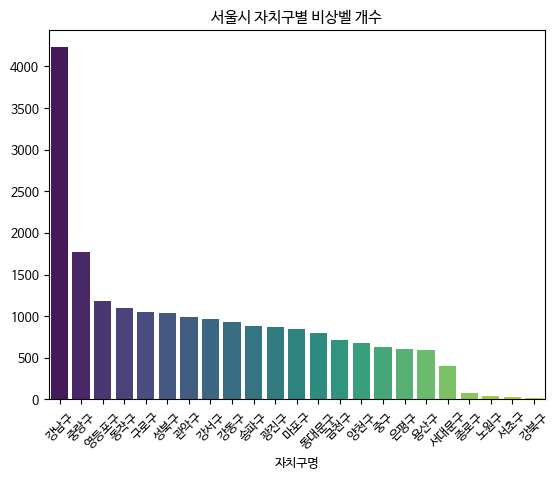

In [55]:
sns.barplot(y=t1.values, x=t1.index, palette='viridis')
plt.xticks(rotation=45)
plt.title('서울시 자치구별 비상벨 개수')
plt.xlabel('자치구명')
mpl.rcParams['font.size'] = 9
plt.show()